This notebook includes SMOTE applied to the training set and visualisations of the oversampling technique (distribution of the resampled data and t-SNE).



# **Import libraries and data**

In [ ]:
!pip install git+https://github.com/paobranco/ImbalancedLearningRegression.git

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import ImbalancedLearningRegression as iblr
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
#Train data set consists of X_train_ig (with 500 features selected by Information Gain in Feature Selection notebook) and y_train
data_train_ig.head()

,seq_TEMP,A,C,E,I,K,L,N,Q,R,...,Normalized van der Waals Volume-T2332,Polarity-T1331,Polarizability-T2332,Charge-T1221,Charge-T1331,Solvent accessibility-T1221,Hydrophobicity_CASG920101-G1D100,Hydrophobicity_FASG890101-G1D100,Normalized van der Waals Volume-G1D100,Charge-G2D100
0,26,0.128743,0.023952,0.059880,0.041916,0.017964,0.083832,0.020958,0.020958,0.083832,...,0.156156,0.213213,0.189189,0.150150,0.048048,0.237237,100.0000,100.000000,100.000000,100.000000
1,30,0.076923,0.008547,0.094017,0.065527,0.068376,0.096866,0.051282,0.025641,0.031339,...,0.180000,0.262857,0.200000,0.165714,0.034286,0.265714,99.7151,98.005698,100.000000,100.000000
2,74,0.043937,0.001757,0.072056,0.108963,0.077329,0.075571,0.047452,0.015817,0.038664,...,0.209507,0.278169,0.228873,0.181338,0.026408,0.288732,100.0000,100.000000,98.242531,100.000000
3,90,0.066055,0.009174,0.102752,0.047706,0.051376,0.095413,0.011009,0.020183,0.106422,...,0.200368,0.257353,0.250000,0.213235,0.053309,0.321691,100.0000,100.000000,99.816514,99.816514
4,29,0.067146,0.007194,0.086331,0.074341,0.050360,0.076739,0.047962,0.069544,0.045564,...,0.197115,0.204327,0.209135,0.149038,0.028846,0.257212,100.0000,100.000000,100.000000,100.000000


In [ ]:
#The training set consists of 2,041 observations
data_train_ig.shape

(2041, 501)

# **Generate synthetic values**

Synthetic Minority Oversampling Technique (SMOTE):  oversamples rare values based on the calculation of linear interpolation between a randomly selected point and its 5-nearest neighbours. SMOTE leaves normal domain values unchanged. The code is borrowed from https://github.com/paobranco/ImbalancedLearningRegression.git 

In [ ]:
## conduct SMOTE
data_train_smote = iblr.smote(
    
    data = data_train_ig,  ## pandas dataframe
    y = 'seq_TEMP'  ## string ('header name'),
)

r_index: 100%|##########| 67/67 [00:01<00:00, 41.08it/s]


In [ ]:
#The training set increased from 2,041 to 2,584 observations
X_train_smote.shape

(2584, 500)

# **Distribution of SMOTE vs Original**


To compare the distribution of Topt in the original and oversampled sets.

In [ ]:
#Define X and y for the resampled training set
X_train_smote = data_train_smote.drop(['seq_TEMP'], axis = 1)
y_train_smote = data_train_smote['seq_TEMP']

Text(0, 0.5, 'Density')

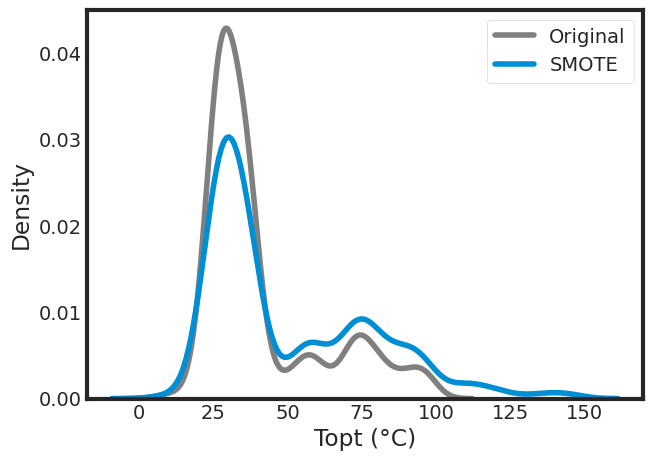

In [ ]:
## plot y distribution 
sns.set_style("white")
sns.kdeplot(data_train_ig['seq_TEMP'], label = "Original", color="grey")
sns.kdeplot(data_train_smote['seq_TEMP'], label = "SMOTE")
plt.legend(labels=["Original","SMOTE"])
plt.xlabel("Topt (°C)")
plt.ylabel("Density")
#plt.title("Distribution of SMOTE vs Original")

# **t-SNE for selected features**

T-SNE is applied to visualize the distribution of the resampled testing data into two-dimensional scale.

In [ ]:
data_train_smote_sc = scaler.fit_transform(data_train_smote.drop(['seq_TEMP'], axis=1))

embedding = TSNE(n_components=2)

# transform on features
new_tsne_smote = embedding.fit_transform(data_train_smote_sc)

# reconstruct dataframe
new_tsne_smote = pd.DataFrame(new_tsne_smote, columns=[f"TSNE{i+1}" for i in range(new_tsne_smote.shape[1])])
new_tsne_smote["seq_TEMP"] = data_train_smote["seq_TEMP"]

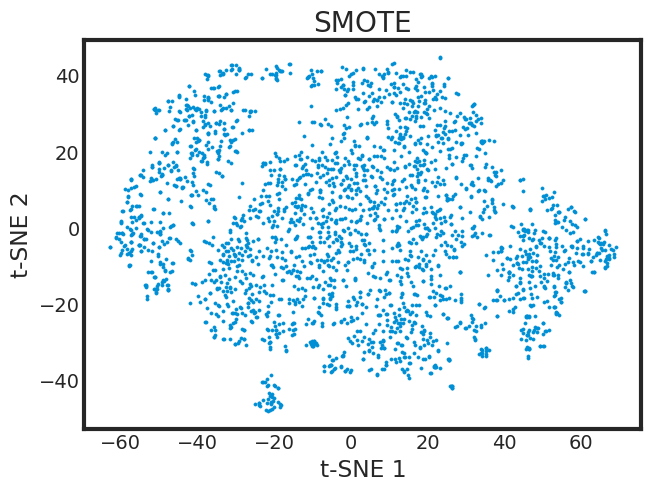

In [ ]:
#Code for displaying principal components
#Code for displaying principal components
sns.set_style("white")
plt.scatter(new_tsne_smote.TSNE1, new_tsne_smote.TSNE2, s=5)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("SMOTE")
plt.show()